In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize":(15, 10)})

In [3]:
file_path="./fraud_data"
in_patient=f"{file_path}/Train_Inpatientdata-1542865627584.csv"
out_patient=f"{file_path}/Train_Outpatientdata-1542865627584.csv"
bene=f"{file_path}/Train_Beneficiarydata-1542865627584.csv"
labelled=f"{file_path}/Train-1542865627584.csv"


In [352]:
df_in = pd.read_csv(in_patient)
df_out = pd.read_csv(out_patient)
df_bene = pd.read_csv(bene)
df_labl = pd.read_csv(labelled)

In [358]:
df_bene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [361]:
df_bene['IPAnnualReimbursementAmt'].head()

0    36000
1        0
2        0
3        0
4        0
Name: IPAnnualReimbursementAmt, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IPAnnualReimbursementAmt'>

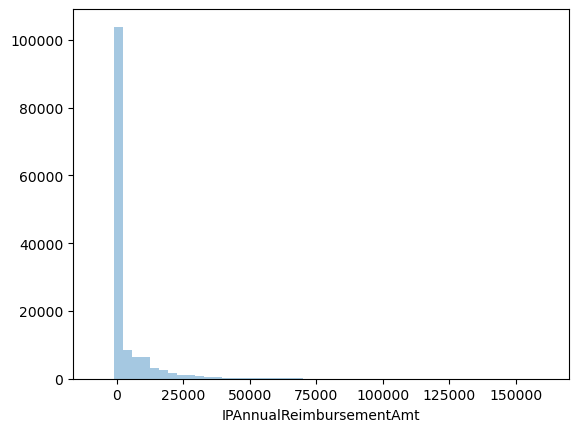

In [363]:
sns.distplot(df_bene['IPAnnualReimbursementAmt'], kde=False)

<AxesSubplot:xlabel='OPAnnualReimbursementAmt'>

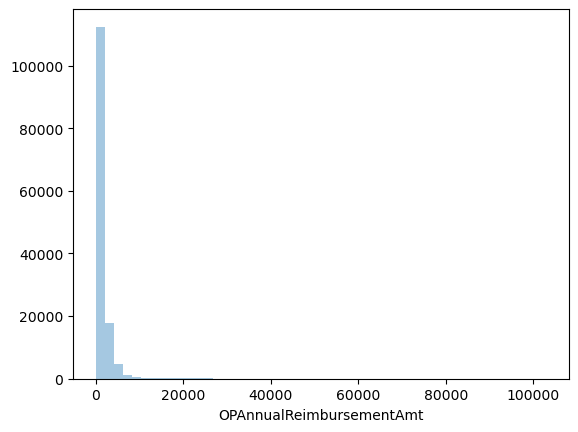

In [364]:
sns.distplot(df_bene['OPAnnualReimbursementAmt'], kde=False)

In [369]:
bene_amt_10 = df_bene.loc[df_bene['OPAnnualReimbursementAmt'] < 10000]

<AxesSubplot:xlabel='OPAnnualReimbursementAmt'>

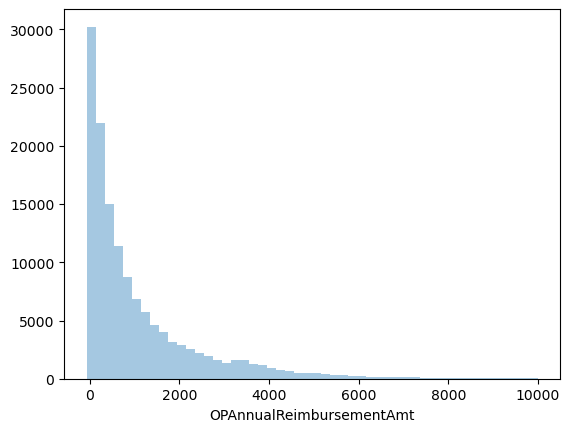

In [371]:
sns.distplot(bene_amt_10['OPAnnualReimbursementAmt'], kde=False)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Race', ylabel='count'>

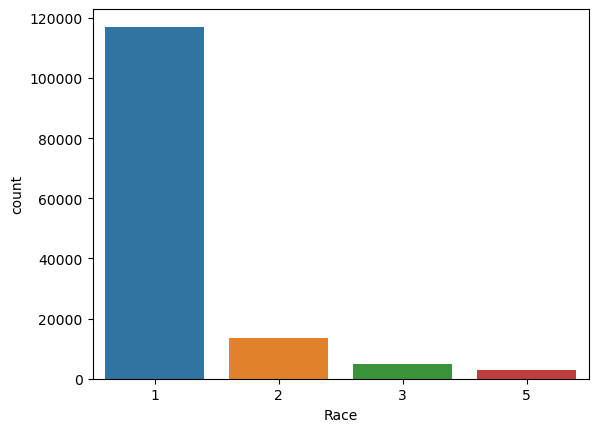

In [375]:
sns.countplot(df_bene['Race'])

In [399]:
my_corr = df_bene.loc[:, ['IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']].corr()
my_corr
my_corr_all = round(df_bene.corr(), 1)
my_corr_all

,Gender,Race,State,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Gender,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0
Race,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
State,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
NoOfMonths_PartACov,0.0,-0.0,-0.0,1.0,0.2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NoOfMonths_PartBCov,0.0,-0.0,0.0,0.2,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
ChronicCond_Alzheimer,-0.0,-0.0,0.0,-0.0,-0.0,1.0,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.1,-0.1,-0.2,-0.1,-0.1
ChronicCond_Heartfailure,-0.0,0.0,-0.0,-0.0,-0.0,0.2,1.0,0.3,0.1,0.3,0.2,0.3,0.3,0.1,0.1,0.1,-0.2,-0.2,-0.1,-0.2
ChronicCond_KidneyDisease,-0.0,-0.0,-0.0,-0.0,-0.0,0.2,0.3,1.0,0.1,0.3,0.2,0.3,0.2,0.1,0.2,0.2,-0.3,-0.3,-0.2,-0.2
ChronicCond_Cancer,0.0,0.0,0.0,-0.0,-0.0,0.1,0.1,0.1,1.0,0.1,0.0,0.1,0.1,0.1,0.1,0.0,-0.1,-0.1,-0.1,-0.1
ChronicCond_ObstrPulmonary,-0.0,0.0,-0.0,-0.0,-0.0,0.2,0.3,0.3,0.1,1.0,0.2,0.2,0.2,0.1,0.1,0.1,-0.2,-0.2,-0.1,-0.1


<AxesSubplot:>

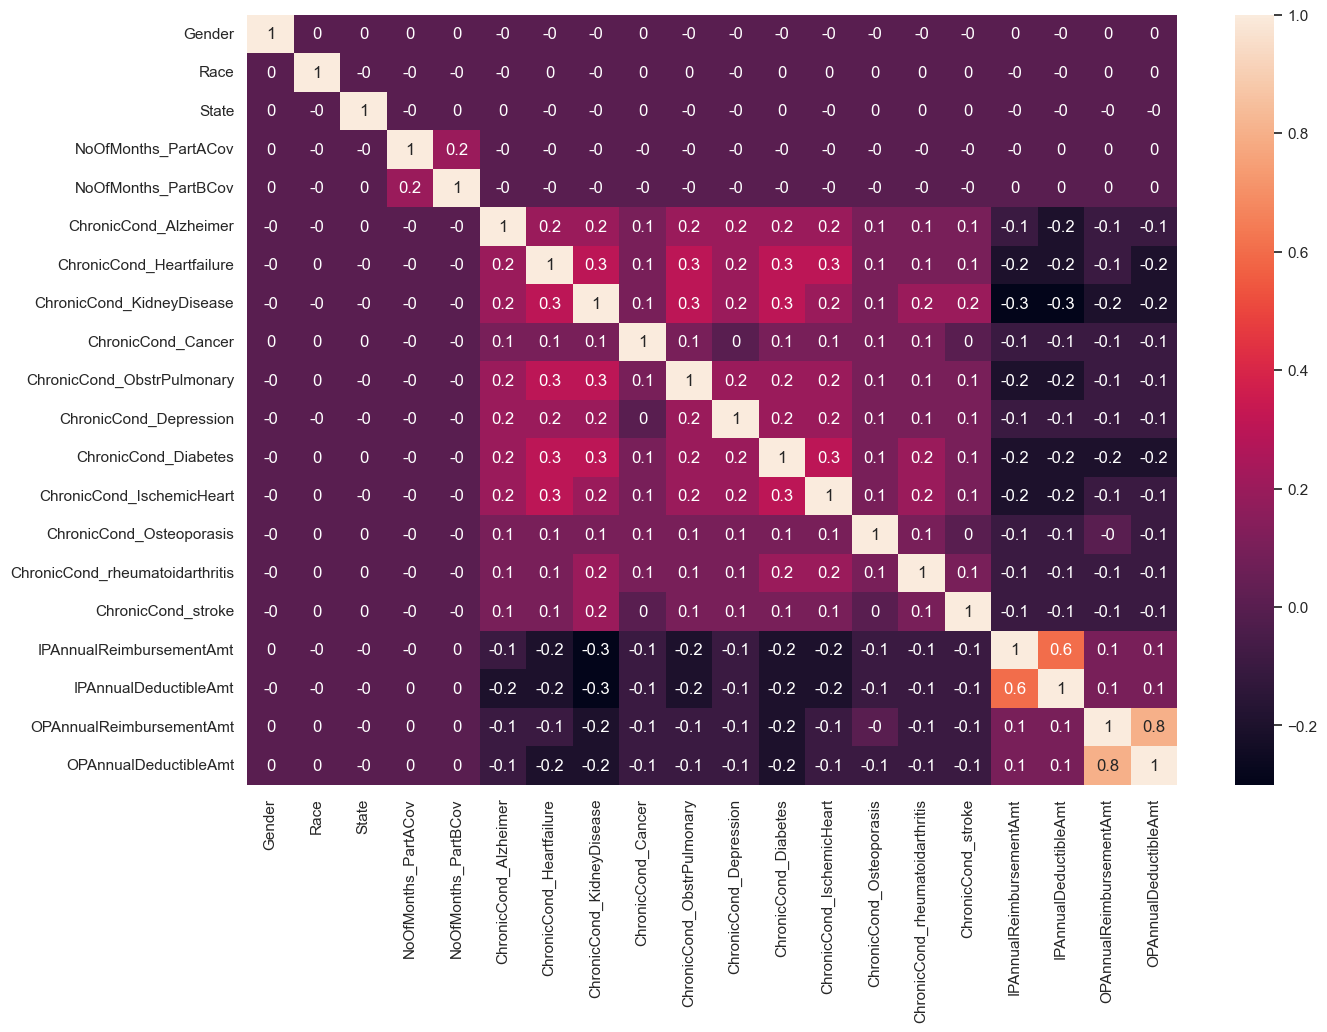

In [400]:
sns.heatmap(my_corr_all, annot=True)

In [394]:
type(df_bene['County'])

numpy.int64

In [395]:
df_bene['County'] = df_bene['County'].astype('str')

In [403]:
pd.crosstab(df_bene['Gender'], df_bene['Race'])

Race,1,2,3,5
Gender,,,,
1,50450,5478,2267,1255
2,66607,8060,2792,1647


In [5]:
df.shape

(517737, 27)

In [351]:
df.describe(include='object')

,BeneID,ClaimID,ClaimStartDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmAdmitDiagnosisCode
count,517737,517737,517737,517737,516341,90617,195046,507284,322357,203257,125596,74344,48756,32961,22912,14838,1083,105425
unique,133980,517737,385,5012,74109,28532,44388,10354,5056,4448,3925,3412,2968,2635,2260,1894,495,3715
top,BENE42721,CLM624349,2009-03-03,PRV51459,PHY330576,PHY330576,PHY412132,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,V7612
freq,29,1,1574,8240,2534,424,1247,13803,19894,12126,7088,4116,2550,1612,1057,616,41,4074


In [7]:
df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
df['ClaimID']

0         CLM624349
1         CLM189947
2         CLM438021
3         CLM121801
4         CLM150998
            ...    
517732    CLM510792
517733    CLM551294
517734    CLM596444
517735    CLM636992
517736    CLM686139
Name: ClaimID, Length: 517737, dtype: object

In [9]:
df.describe(include=object)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmAdmitDiagnosisCode
count,517737,517737,517737,517737,517737,516341,90617,195046,507284,322357,203257,125596,74344,48756,32961,22912,14838,1083,105425
unique,133980,517737,385,366,5012,74109,28532,44388,10354,5056,4448,3925,3412,2968,2635,2260,1894,495,3715
top,BENE42721,CLM624349,2009-03-03,2009-03-03,PRV51459,PHY330576,PHY330576,PHY412132,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,V7612
freq,29,1,1574,1563,8240,2534,424,1247,13803,19894,12126,7088,4116,2550,1612,1057,616,41,4074


In [10]:
np_data = np.genfromtxt(fname=in_patient, delimiter=",", names=True)

In [11]:
np_data

array([(nan, nan, nan, nan, nan, 26000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,   nan, nan, nan, nan, nan, nan),
       (nan, nan, nan, nan, nan,  5000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7092., nan, nan, nan, nan, nan),
       (nan, nan, nan, nan, nan,  5000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,   nan, nan, nan, nan, nan, nan),
       ...,
       (nan, nan, nan, nan, nan,  3000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 9390., nan, nan, nan, nan, nan),
       (nan, nan, nan, nan, nan,  5000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,   nan, nan, nan, nan, nan, nan),
       (nan, nan, nan, nan, nan, 15000., nan, nan, nan, nan, nan, 1068., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1733., nan, nan, nan, nan

In [12]:
%%timeit

max([row[6] for row in np_data])

9.03 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
array_dict = {
    col: np.array([row[i] for row in np_data]) for i, col in enumerate(np_data.dtype.names)
}

In [14]:
array_dict

{'BeneID': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClaimID': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClaimStartDt': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClaimEndDt': array([nan, nan, nan, ..., nan, nan, nan]),
 'Provider': array([nan, nan, nan, ..., nan, nan, nan]),
 'InscClaimAmtReimbursed': array([26000.,  5000.,  5000., ...,  3000.,  5000., 15000.]),
 'AttendingPhysician': array([nan, nan, nan, ..., nan, nan, nan]),
 'OperatingPhysician': array([nan, nan, nan, ..., nan, nan, nan]),
 'OtherPhysician': array([nan, nan, nan, ..., nan, nan, nan]),
 'AdmissionDt': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClmAdmitDiagnosisCode': array([nan, nan, nan, ..., nan, nan, nan]),
 'DeductibleAmtPaid': array([1068., 1068., 1068., ..., 1068., 1068., 1068.]),
 'DischargeDt': array([nan, nan, nan, ..., nan, nan, nan]),
 'DiagnosisGroupCode': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClmDiagnosisCode_1': array([nan, nan, nan, ..., nan, nan, nan]),
 'ClmDiagnosisCode_2': a

In [15]:
array_dict['InscClaimAmtReimbursed'].max()

125000.0

In [16]:
insamt = pd.Series(array_dict['InscClaimAmtReimbursed'], name='InsAmtPaid')

In [17]:
insamt

0        26000.0
1         5000.0
2         5000.0
3         5000.0
4        10000.0
          ...   
40469     7000.0
40470     4000.0
40471     3000.0
40472     5000.0
40473    15000.0
Name: InsAmtPaid, Length: 40474, dtype: float64

In [18]:
insamt.index

RangeIndex(start=0, stop=40474, step=1)

In [20]:
df[
    ['BeneID','ClaimID'] +
    [col for col in df.columns if col.startswith('D')]
  ]

,BeneID,ClaimID,DeductibleAmtPaid
0,BENE11002,CLM624349,0
1,BENE11003,CLM189947,0
2,BENE11003,CLM438021,0
3,BENE11004,CLM121801,0
4,BENE11004,CLM150998,0
...,...,...,...
517732,BENE159198,CLM510792,0
517733,BENE159198,CLM551294,0
517734,BENE159198,CLM596444,0
517735,BENE159198,CLM636992,0


In [21]:
df[1000:1005][[col for col in df.columns if col.startswith('A')]]

,AttendingPhysician
1000,PHY391983
1001,PHY385642
1002,PHY364833
1003,PHY372103
1004,PHY404832


In [22]:
df[['BeneID', 'ClaimID']][4:9]

,BeneID,ClaimID
4,BENE11004,CLM150998
5,BENE11004,CLM173224
6,BENE11004,CLM224741
7,BENE11004,CLM252512
8,BENE11004,CLM322683


In [23]:
df.loc[100:105, 'BeneID']

100    BENE11023
101    BENE11024
102    BENE11024
103    BENE11024
104    BENE11024
105    BENE11024
Name: BeneID, dtype: object

In [24]:
df.iloc[100:105, [0,3,1]]

,BeneID,ClaimEndDt,ClaimID
100,BENE11023,2009-12-25,CLM744555
101,BENE11024,2009-03-17,CLM250616
102,BENE11024,2009-04-17,CLM295157
103,BENE11024,2009-05-04,CLM302479
104,BENE11024,2009-05-04,CLM302480


In [25]:
df.loc[ df['InscClaimAmtReimbursed'] == 30, ['BeneID', 'ClaimID', 'InscClaimAmtReimbursed']]

,BeneID,ClaimID,InscClaimAmtReimbursed
0,BENE11002,CLM624349,30
28,BENE11008,CLM226681,30
50,BENE11013,CLM164835,30
51,BENE11013,CLM229436,30
60,BENE11016,CLM269052,30
...,...,...,...
517654,BENE159183,CLM457114,30
517675,BENE159187,CLM266352,30
517692,BENE159191,CLM417993,30
517706,BENE159195,CLM624348,30


In [26]:
df.loc[[ df.InscClaimAmtReimbursed.idxmin(), df.InscClaimAmtReimbursed.idxmax()] ]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
30,BENE11009,CLM352194,2009-05-11,2009-05-11,PRV56454,0,PHY323051,NaN,PHY323051,72764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9326,BENE13669,CLM82013,2009-09-14,2009-10-07,PRV55172,102500,PHY387333,PHY432582,NaN,41011,...,NaN,NaN,4573.0,3811.0,NaN,NaN,NaN,NaN,876,85186


In [27]:
dfcopy = df.copy(deep=True)

In [28]:
dfcopy.assign(is99 = dfcopy.InscClaimAmtReimbursed <= 50, 
              is200 = dfcopy.InscClaimAmtReimbursed.between(51,100),
              neither = lambda x: ~x.is99 & ~x.is200
             ).sample(5, random_state=0)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,is99,is200,neither
497749,BENE153382,CLM303334,2009-04-14,2009-04-14,PRV52017,50,PHY387685,NaN,NaN,V5861,...,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False
120212,BENE45394,CLM603386,2009-09-28,2009-09-28,PRV56560,40,PHY356646,NaN,NaN,V824,...,NaN,NaN,NaN,NaN,NaN,0,V7611,True,False,False
123819,BENE46440,CLM189243,2009-02-11,2009-02-11,PRV51567,50,PHY350277,NaN,NaN,1741,...,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False
325603,BENE104346,CLM667964,2009-11-06,2009-11-06,PRV57523,1900,PHY337502,NaN,PHY337502,59389,...,NaN,NaN,NaN,NaN,NaN,0,NaN,False,False,True
206977,BENE70407,CLM383634,2009-05-28,2009-05-28,PRV55701,40,PHY353119,PHY335996,NaN,11590,...,NaN,NaN,NaN,NaN,NaN,0,NaN,True,False,False


In [29]:
df.OtherPhysician.value_counts()

PHY412132    1247
PHY341578    1098
PHY338032    1070
PHY337425    1041
PHY347064     806
             ... 
PHY363194       1
PHY415806       1
PHY432261       1
PHY400535       1
PHY373809       1
Name: OtherPhysician, Length: 44388, dtype: int64

In [30]:
df2 = pd.read_csv(bene)

In [32]:
dfcomb = pd.concat( [dfcopy.head(4), df2.head(4)], axis=1, join='inner')

In [33]:
dfcomb

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,2,1,1,1,1,2,0,0,1810,760


In [34]:
df3 = pd.read_csv(bene)

In [35]:
df3.groupby(['Gender']).describe(percentiles=[])

Race                                       State             \
          count      mean       std  min  50%  max    count       mean   
Gender                                                                   
1       59450.0  1.252851  0.720079  1.0  1.0  5.0  59450.0  25.545685   
2       79106.0  1.255758  0.714691  1.0  1.0  5.0  79106.0  25.757705   

                        ... OPAnnualReimbursementAmt                         \
              std  min  ...                      std   min    50%       max   
Gender                  ...                                                   
1       15.252440  1.0  ...              2439.687573 -60.0  560.0  102960.0   
2       15.201077  1.0  ...              2533.788766 -70.0  580.0  101250.0   

       OPAnnualDeductibleAmt                                               
                       count        mean         std  min    50%      max  
Gender                                                                     
1                    59450.0  372.040320  637.864223  0.0  160.0  13040.0  
2                    79106.0  381.985361  651.203385  0.0  170.0  13840.0  

[2 rows x 120 columns]

In [36]:
obj1 = {'lkey': ['a', 'b', 'c'],
        'value': [1, 2, 3]
        }

obj2 = {'rkey': ['x', 'a', 'y'],
        'value': [26, 39,56]
       }

df_obj1 = pd.DataFrame(obj1)
df_obj2 = pd.DataFrame(obj2)

In [37]:
df_obj1

,lkey,value
0,a,1
1,b,2
2,c,3


In [38]:
df_obj2

,rkey,value
0,x,26
1,a,39
2,y,56


In [39]:
df_obj1.merge(df_obj2, how='right', left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,NaN,NaN,x,26
1,a,1.0,a,39
2,NaN,NaN,y,56


In [41]:
df_out = pd.read_csv(out_patient)

In [42]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [43]:
# df.plot(x='InscClaimAmtReimbursed', y=['DeductibleAmtPaid'], figsize=(15,5), title='Claims Vs Benes')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ClaimID', ylabel='BeneID'>

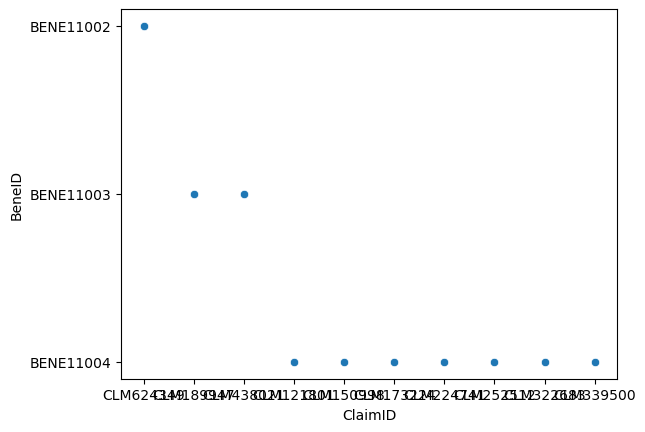

In [75]:
sns.scatterplot(df.head(10)['ClaimID'], df.head(10)['BeneID'])

In [46]:
df.loc[:, 'ClaimEndDt']= pd.to_datetime(df.ClaimEndDt)

In [47]:
df.ClaimEndDt.describe(datetime_is_numeric=True)

count                           517737
mean     2009-06-26 19:35:21.692674048
min                2008-12-28 00:00:00
25%                2009-03-29 00:00:00
50%                2009-06-25 00:00:00
75%                2009-09-23 00:00:00
max                2009-12-31 00:00:00
Name: ClaimEndDt, dtype: object

In [48]:
df_in = pd.read_csv(in_patient)
df_out = pd.read_csv(out_patient)
df_bene = pd.read_csv(bene)
df_labl = pd.read_csv(labelled)

In [49]:
df_labl[df_labl.PotentialFraud == 'No'].head()

,Provider,PotentialFraud
0,PRV51001,No
2,PRV51004,No
4,PRV51007,No
5,PRV51008,No
6,PRV51011,No


In/Out Patients:

1. what are the common attributes for PotentialFraud providers.
2. Is the same patient treated as in-patient & out-patient within short duration
3. What type of diagnosis is used often in fraudlent claims
4. How to detrmine if a claim is fraud ?


In [141]:
df_out_new = df_labl.merge(df_out, how='inner', left_on='Provider', right_on='Provider', suffixes=('_left', '_right'))

In [142]:
df_out_new[df_out_new.PotentialFraud == 'Yes'].head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
20,PRV51003,Yes,BENE11305,CLM374220,2009-05-23,2009-06-12,2400,PHY327121,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
21,PRV51003,Yes,BENE12706,CLM220170,2009-02-28,2009-02-28,200,PHY370539,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
22,PRV51003,Yes,BENE16670,CLM524110,2009-08-14,2009-08-16,200,PHY430761,NaN,NaN,...,4019,7802,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
23,PRV51003,Yes,BENE17227,CLM176030,2009-02-04,2009-02-04,1200,PHY384570,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
24,PRV51003,Yes,BENE17385,CLM252553,2009-03-18,2009-03-18,40,PHY418784,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [143]:
df_out_new[df_out_new.duplicated(['Provider', 'BeneID', 'AttendingPhysician'], keep=False)] #.Provider.isin(['PRV51001'])

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
247,PRV51005,Yes,BENE13516,CLM202850,2009-02-19,2009-02-19,400,PHY319039,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
248,PRV51005,Yes,BENE13516,CLM495541,2009-07-29,2009-07-29,70,PHY319039,NaN,PHY319039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
253,PRV51005,Yes,BENE15509,CLM128998,2009-01-10,2009-01-10,200,PHY341553,PHY342753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,83109
254,PRV51005,Yes,BENE15509,CLM511693,2009-08-07,2009-08-07,60,PHY342753,PHY342753,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8830
256,PRV51005,Yes,BENE15509,CLM562830,2009-09-05,2009-09-05,10,PHY341553,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,42731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517728,PRV57763,No,BENE142602,CLM710306,2009-12-02,2009-12-02,200,PHY321072,NaN,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,NaN
517729,PRV57763,No,BENE145727,CLM257950,2009-03-20,2009-03-20,300,PHY321072,NaN,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517730,PRV57763,No,BENE145727,CLM330019,2009-04-28,2009-04-28,300,PHY321072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300,PHY321072,NaN,PHY321072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [151]:
#plt.plot(df_out_new.BeneID, df_out_new.InscCPlease laimAmtReimbursed)
#plt.show()
df_out_new.ClmDiagnosisCode_1.unique()

array(['5953', '78650', 'V446', ..., '04500', 'E8843', '94882'],
      dtype=object)

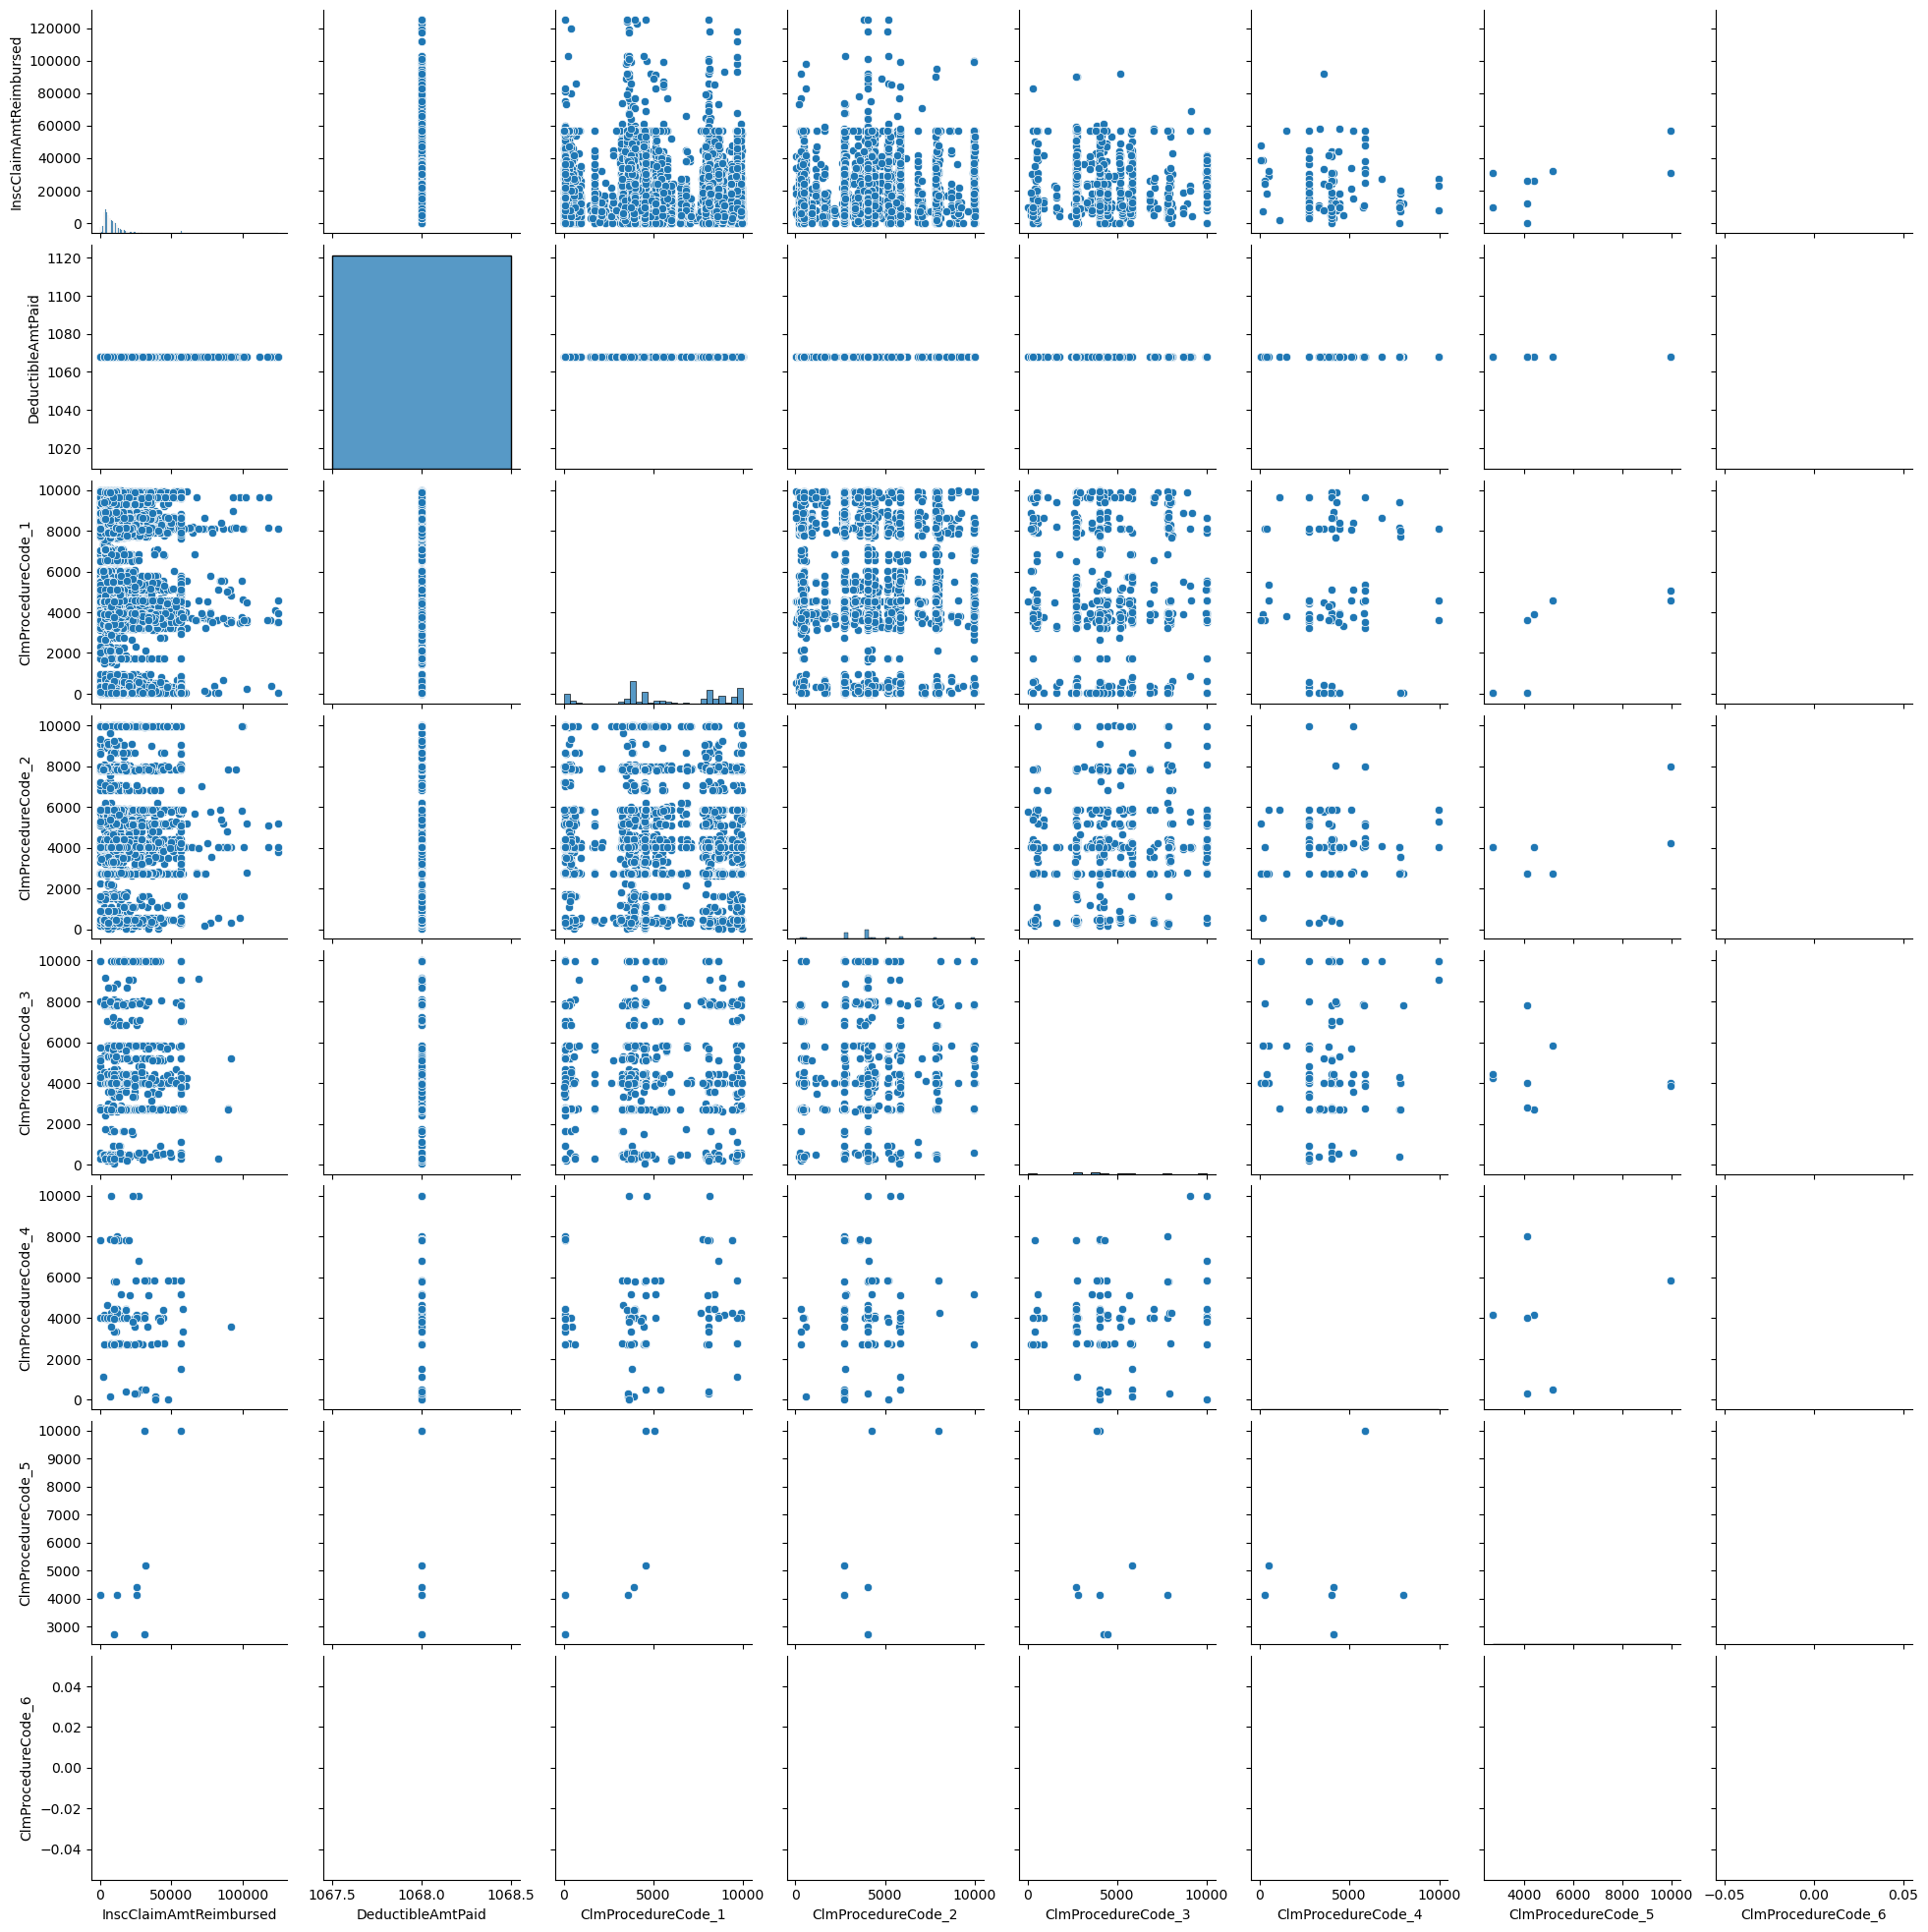

In [154]:
sns.pairplot(df_in)

In [193]:
df_bene.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


<AxesSubplot:xlabel='ChronicCond_Diabetes', ylabel='Gender'>

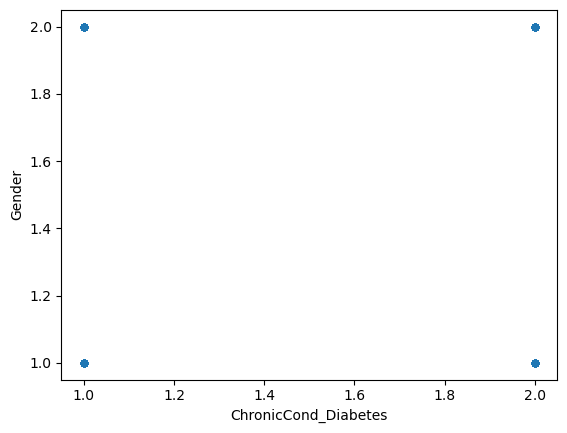

In [192]:
df_bene.plot(kind='scatter', y='Gender', x='ChronicCond_Diabetes', style='-b')

Beneficiaries

1. Which Gender & Race are mostly on fradulent claims
2. What age group is mostly affected by fraud
3. What Chronic disease is mostly treated by fradulent providers?


In [258]:
df_bene_bins = pd.cut(df_bene.DOb

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [275]:
# race_df = pd.cut(df_bene.Race, bins=4, labels=['R1', 'R2', 'R3', 'R5'])

In [340]:
len(df_bene.query('Gender == 1'))

59450

In [345]:
df_bene.groupby(['Gender']).count()

,BeneID,DOB,DOD,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
Gender,,,,,,,,,,,,,,,,,,,,,
1,59450,59450,599,59450,59450,59450,59450,59450,59450,59450,...,59450,59450,59450,59450,59450,59450,59450,59450,59450,59450
2,79106,79106,822,79106,79106,79106,79106,79106,79106,79106,...,79106,79106,79106,79106,79106,79106,79106,79106,79106,79106


In [348]:
df_bene.groupby(['Gender', 'Race']).size()

Gender  Race
1       1       50450
        2        5478
        3        2267
        5        1255
2       1       66607
        2        8060
        3        2792
        5        1647
dtype: int64